In [1]:
from utils import * 
import pennylane as qml
import os 
from autoencoder8 import *
fid_fold = 'reconstruction_fidelity_fi'
emd_fold = 'reconstruction_fidelity_em'



In [2]:
reses =[]
for subfolder in os.listdir(emd_fold):
    df = pd.read_csv(os.path.join(emd_fold,subfolder),header = 0).drop(['Unnamed: 0'],axis = 1)
    res ={'model':df.file[0],
          'vloss':df.vloss[0]/(8-df.mq[0]),
          'tloss':df.tloss[0]/(8-df.mq[0]),
          'fid':np.mean(df.fidelity),
          'mq':df.mq[0],
          'loss':df.train_type[0]
          }
    reses.append(res)

dfw= pd.DataFrame(reses)
reses =[]
for subfolder in os.listdir(fid_fold):
    df = pd.read_csv(os.path.join(fid_fold,subfolder),header = 0).drop(['Unnamed: 0'],axis = 1)
    res ={'model':df.file[0],
          'vloss':df.vloss[0]/(8-df.mq[0]),
          'tloss':df.tloss[0]/(8-df.mq[0]),
          'fid':np.mean(df.fidelity),
          'mq':df.mq[0],
          'loss':df.train_type[0]
          }
    reses.append(res)

df= pd.concat([dfw,pd.DataFrame(reses)])
    


In [3]:
df.loss.unique()


array(['em', 'fi'], dtype=object)

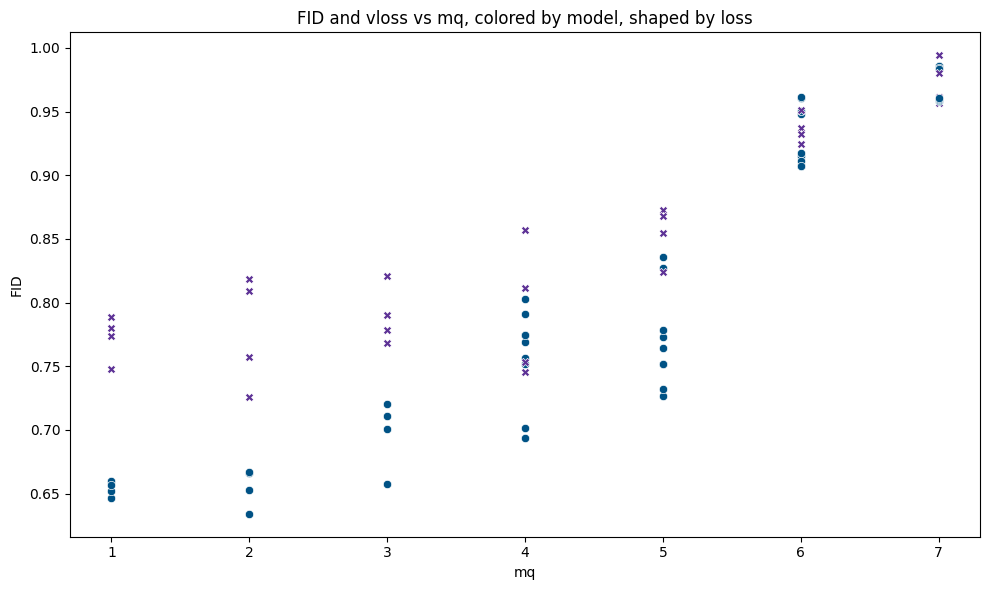

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

# Seaborn style


# Unique models and loss bins
models = df['model'].unique()
loss_bins = df['loss'].unique()
palette1=["#005285","#5E3396"]
# palette1 = [sns.color_palette("blend:#1B4965,#1B4965",n_colors=len(models)),sns.color_palette("blend:#501F91,#501F91",n_colors=len(models))]
# palette2 = sns.color_palette("blend:#501F91,#501F91",n_colors=len(models))
marker_styles = ['o','X',]  # One for each loss_bin

# Create plot
fig, ax1 = plt.subplots(figsize=(10, 6))
# ax2 = ax1.twinx()

# Plot each model + loss bin
for i, model in enumerate(models):
    model_data = df[df['model'] == model]

    for j, loss_level in enumerate(loss_bins):
        sub_data = model_data[model_data['loss'] == loss_level].sort_values(by='mq')
        if sub_data.empty:
            continue
        
        # FID on ax1
        sns.scatterplot(
            data=sub_data, x='mq', y='fid', ax=ax1,
            color=palette1[j], marker=marker_styles[j],
        )

        # vloss on ax2
        # sns.scatterplot(
        #     data=sub_data, x='mq', y='vloss', ax=ax2,
        #     color=palette2[i], marker=marker_styles[j],
        # )

# Labels
ax1.set_xlabel("mq")
ax1.set_ylabel("FID")
# ax2.set_ylabel("Validation Loss (vloss)")
plt.title("FID and vloss vs mq, colored by model, shaped by loss")

# Combine legends
# lines1, labels1 = ax1.get_legend_handles_labels()
# lines2, labels2 = ax2.get_legend_handles_labels()
# ax1.legend(lines1 + lines2, labels1 + labels2, loc="upper right", fontsize=9)

plt.tight_layout()
plt.show()
